# Gathering Data  

In [283]:
#Import required packages

import pandas as pd
import numpy as np
import requests
import tweepy
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import os

In [284]:
#Load twitter posts archive

archive = pd.read_csv('twitter-archive-enhanced.csv')

In [285]:
#Load Image predicitons dataset

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
    
images = pd.read_csv('image_predictions.tsv',sep='\t')

In [286]:
# Query twitter API

'''consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)'''

"consumer_key = 'sin2CezVdJtzBDAUleNvRHMdt'\nconsumer_secret = 'isatktciP8nrlJETY997HpLslZwL4aNAKctJ7KIuB0OhpHkdpZ'\naccess_token = '468242068-CBYGWUI48XSmbu05SoRgl1OyNQhlMo0u6jxLgQPt'\naccess_secret = 'HMLdIBUA99klH6acwIYQ5IOnNl4Xgw4KmPCQpxampqHww'\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)"

In [287]:
'''list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)'''

"list_of_tweets = []\n# Tweets that can't be found are saved in the list below:\ncant_find_tweets_for_those_ids = []\nfor tweet_id in archive['tweet_id']:   \n    try:\n        list_of_tweets.append(api.get_status(tweet_id))\n    except Exception as e:\n        cant_find_tweets_for_those_ids.append(tweet_id)"

In [288]:
'''my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet._json)'''

'my_list_of_dicts = []\nfor each_json_tweet in list_of_tweets:\n    my_list_of_dicts.append(each_json_tweet._json)'

In [289]:
'''with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))'''

"with open('tweet_json.txt', 'w') as file:\n        file.write(json.dumps(my_list_of_dicts, indent=4))"

In [290]:
'''my_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])'''

'my_list = []\nwith open(\'tweet_json.txt\', encoding=\'utf-8\') as json_file:  \n    all_data = json.load(json_file)\n    for each_dictionary in all_data:\n        tweet_id = each_dictionary[\'id\']\n        whole_tweet = each_dictionary[\'text\']\n        only_url = whole_tweet[whole_tweet.find(\'https\'):]\n        favorite_count = each_dictionary[\'favorite_count\']\n        retweet_count = each_dictionary[\'retweet_count\']\n        created_at = each_dictionary[\'created_at\']\n        whole_source = each_dictionary[\'source\']\n        only_device = whole_source[whole_source.find(\'rel="nofollow">\') + 15:-4]\n        source = only_device\n        retweeted_status = each_dictionary[\'retweeted_status\'] = each_dictionary.get(\'retweeted_status\', \'Original tweet\')\n        if retweeted_status == \'Original tweet\':\n            url = only_url\n        else:\n            retweeted_status = \'This is a retweet\'\n            url = \'This is a retweet\'\n\n        my_list.append({

In [291]:
tweet_json.head()

tweet_id  favorite_count  retweet_count  \
0  892420643555336193           35694           7549   
1  892177421306343426           30870           5594   
2  891815181378084864           23208           3705   
3  891689557279858688           38993           7730   
4  891327558926688256           37248           8330   

                       created_at              source retweeted_status  \
0  Tue Aug 01 16:23:56 +0000 2017  Twitter for iPhone   Original tweet   
1  Tue Aug 01 00:17:27 +0000 2017  Twitter for iPhone   Original tweet   
2  Mon Jul 31 00:18:03 +0000 2017  Twitter for iPhone   Original tweet   
3  Sun Jul 30 15:58:51 +0000 2017  Twitter for iPhone   Original tweet   
4  Sat Jul 29 16:00:24 +0000 2017  Twitter for iPhone   Original tweet   

                       url  
0  https://t.co/MgUWQ76dJU  
1  https://t.co/aQFSeaCu9L  
2  https://t.co/r0YlrsGCgy  
3  https://t.co/tD36da7qLQ  
4  https://t.co/0g0KMIVXZ3

# Assessing Data

In [292]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [382]:
archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1095  736392552031657984                    NaN                  NaN   
318   834574053763584002                    NaN                  NaN   
119   869772420881756160                    NaN                  NaN   
189   855860136149123072           8.558585e+17           13615722.0   
445   819227688460238848                    NaN                  NaN   

                      timestamp  \
1095  2016-05-28 03:04:00 +0000   
318   2017-02-23 01:22:14 +0000   
119   2017-05-31 04:27:59 +0000   
189   2017-04-22 19:05:32 +0000   
445   2017-01-11 17:01:16 +0000   

                                                                                  source  \
1095                     <a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>   
318   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
119   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
189   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
445   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                        text  \
1095                     Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX   
318               Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg   
119   This is Dewey (pronounced "covfefe"). He's having a good walk. Arguably the best walk. 13/10 would snug softly https://t.co/HciEaJkC4D   
189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
445          This is Finn. He's wondering if you come here often. Fr*ckin flirtatious af. 12/10 would give number to https://t.co/ii5eNX5LJT   

      retweeted_status_id  retweeted_status_user_id  \
1095                  NaN                       NaN   
318                   NaN                       NaN   
119                   NaN                       NaN   
189                   NaN                       NaN   
445                   NaN                       NaN   

     retweeted_status_timestamp  \
1095                        NaN   
318                         NaN   
119                         NaN   
189                         NaN   
445                         NaN   

                                                        expanded_urls  \
1095                                    https://vine.co/v/iEggaEOiLO3   
318   https://twitter.com/dog_rates/status/834574053763584002/photo/1   
119   https://twitter.com/dog_rates/status/869772420881756160/photo/1   
189                                                               NaN   
445   https://twitter.com/dog_rates/status/819227688460238848/photo/1   

      rating_numerator  rating_denominator   name  doggo floofer  pupper puppo  
1095                13                  10    mad   None    None  pupper  None  
318                 13                  10   None  doggo    None    None  None  
119                 13                  10  Dewey   None    None    None  None  
189                666                  10   None   None    None    None  None  
445                 12                  10   Finn   None    None    None  None

In [294]:
#Check for null values

archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [295]:
#Value counts for the source column

archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [296]:
#check for duplicate IDs

archive[archive.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [390]:
#Check for possible issue in denominator not equal to 10 

archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [391]:
archive.name.value_counts().head(20)

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
Sadie        8
the          8
Toby         7
Daisy        7
an           7
Bailey       7
Buddy        7
Stanley      6
Jack         6
Name: name, dtype: int64

In [298]:
#Further explore the denominators

pd.set_option('display.max_colwidth', 1000)
denominator = archive.loc[archive['rating_denominator'] != 10, ['tweet_id','text','rating_numerator','rating_denominator']]

In [299]:
len(denominator)

23

In [389]:
#Check for possible issue in numerator not equal to 10-14

archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [301]:
#Further explore numerators

numerator=archive.loc[archive['rating_numerator'] >20, ['tweet_id','text','rating_numerator','rating_denominator']]
numerator

tweet_id  \
188   855862651834028034   
189   855860136149123072   
290   838150277551247360   
313   835246439529840640   
340   832215909146226688   
433   820690176645140481   
516   810984652412424192   
695   786709082849828864   
763   778027034220126208   
902   758467244762497024   
979   749981277374128128   
1120  731156023742988288   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1634  684225744407494656   
1635  684222868335505415   
1712  680494726643068929   
1779  677716515794329600   
1843  675853064436391936   
2074  670842764863651840   

                                                                                                                                                                           text  \
188                                                                                      @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research   
189                                       @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10   
290                                                                                                                                                          @markhoppus 182/10   
313                                                                          @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho   
340                                RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
695                                            This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763           This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
979                                                                                              This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wedn

In [302]:
len(numerator)

24

In [394]:
archive[archive.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/Users/mariam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


text  \
45                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
340                        RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…   
695                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
763   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1689                                                         I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace   
1712                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

      rating_numerator  
45                   5  
340                 75  
695                 75  
763                 27  
1689                 5  
1712                26

In [303]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [304]:
images.sample(10)

tweet_id                                          jpg_url  \
1567  794205286408003585  https://pbs.twimg.com/media/CwWVe_3WEAAHAvx.jpg   
2008  878057613040115712  https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg   
47    666817836334096384  https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
1651  809448704142938112  https://pbs.twimg.com/media/Czu9RiwVEAA_Okk.jpg   
757   688547210804498433  https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg   
1531  789599242079838210  https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg   
9     666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
1087  718939241951195136  https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg   
980   707315916783140866  https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg   
1014  709566166965075968  https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg   

      img_num                          p1   p1_conf  p1_dog  \
1567        3                    pedestal  0.662660   False   
2008        1              French_bulldog  0.839097    True   
47          1         miniature_schnauzer  0.496953    True   
1651        1  Greater_Swiss_Mountain_dog  0.375415    True   
757         1                    papillon  0.531279    True   
1531        2    Chesapeake_Bay_retriever  0.878822    True   
9           1            miniature_poodle  0.201493    True   
1087        1                    Pembroke  0.766327    True   
980         2        Bernese_mountain_dog  0.979235    True   
1014        1                        chow  0.999837    True   

                      p2   p2_conf  p2_dog                           p3  \
1567            fountain  0.294827   False                        brass   
2008         Boston_bull  0.078799    True                  toy_terrier   
47    standard_schnauzer  0.285276    True              giant_schnauzer   
1651            Cardigan  0.134317    True             English_springer   
757     Blenheim_spaniel  0.214197    True                Border_collie   
1531              beagle  0.018570    True           Labrador_retriever   
9               komondor  0.192305    True  soft-coated_wheaten_terrier   
1087            Cardigan  0.222126    True                toilet_tissue   
980    Shetland_sheepdog  0.011037    True                  Appenzeller   
1014     Tibetan_mastiff  0.000117    True           Australian_terrier   

       p3_conf  p3_dog  
1567  0.020371   False  
2008  0.015243    True  
47    0.073764    True  
1651  0.073697    True  
757   0.053840    True  
1531  0.017499    True  
9     0.082086    True  
1087  0.006757   False  
980   0.003971    True  
1014  0.000011    True

In [305]:
#Check for any format/quality issues

images.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [306]:
images.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [307]:
images.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [308]:
images.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [309]:
# Checking for duplicated columns

all_columns = pd.Series(list(archive) + list(images) + list(tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
33      source
dtype: object

In [310]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2330 non-null   object
 1   favorite_count    2330 non-null   int64 
 2   retweet_count     2330 non-null   int64 
 3   created_at        2330 non-null   object
 4   source            2330 non-null   object
 5   retweeted_status  2330 non-null   object
 6   url               2330 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.5+ KB


In [311]:
tweet_json.sample(10)

tweet_id  favorite_count  retweet_count  \
1743  678389028614488064            1821            408   
2279  666837028449972224             760            510   
784   772117678702071809            3765            737   
2066  670782429121134593            1460            720   
577   798701998996647937               0           7819   
1531  688894073864884227            2201            669   
2107  670073503555706880            1478            740   
80    877201837425926144           25154           5007   
1502  690374419777196032            3201            828   
666   788178268662984705            7271           2102   

                          created_at              source   retweeted_status  \
1743  Sun Dec 20 01:38:42 +0000 2015  Twitter for iPhone     Original tweet   
2279  Wed Nov 18 04:35:11 +0000 2015  Twitter for iPhone     Original tweet   
784   Sat Sep 03 17:02:54 +0000 2016  Twitter for iPhone     Original tweet   
2066  Sun Nov 29 01:52:48 +0000 2015  Twitter for iPhone     Original tweet   
577   Wed Nov 16 01:39:30 +0000 2016  Twitter for iPhone  This is a retweet   
1531  Mon Jan 18 01:22:00 +0000 2016  Twitter for iPhone     Original tweet   
2107  Fri Nov 27 02:55:47 +0000 2015  Twitter for iPhone     Original tweet   
80    Tue Jun 20 16:29:50 +0000 2017  Twitter for iPhone     Original tweet   
1502  Fri Jan 22 03:24:22 +0000 2016  Twitter for iPhone     Original tweet   
666   Tue Oct 18 00:41:57 +0000 2016  Twitter for iPhone     Original tweet   

                          url  
1743  https://t.co/auOoKuoveM  
2279  https://t.co/xYGdBrMS9h  
784   https://t.co/GHOfbTVQti  
2066  https://t.co/6dioUL6gcP  
577         This is a retweet  
1531  https://t.co/ROPZcAMQKI  
2107  https://t.co/exGrzT9O88  
80    https://t.co/kVwm88J6Yr  
1502  https://t.co/VpfFCKE28C  
666   https://t.co/s7MgFWDySc

In [312]:
#Check for duplicate values

sum(tweet_json.duplicated())

0

In [313]:
#Check for null values

tweet_json.isnull().sum()

tweet_id            0
favorite_count      0
retweet_count       0
created_at          0
source              0
retweeted_status    0
url                 0
dtype: int64

# Issues

### Quality

> #### Twitter archive
1.	Timestamp column should be in time format and not as object.
2.	We only need user ratings and not retweets and the data set has some unnecessary columns.
3.	Source column data is unreadable HTML.
4.  The name column has a lot of non-name values. The most popular name is 'a' which is not a name at all.

> #### Twitter Images
5.	Images, p1_conf, p2_conf and p3_conf aren’t headers properly names.
6.	p1, p2, and p3 values aren’t consistently named.
7.	Breed types for p1, p2, and p3 should be in category format and Tweet ID’s should be strings and not Integers.
8. Denominator and numerator ratings have some  incorrect values.

> #### Twitter Json
9.	Delete unnecessary columns.


### Tidiness

> 1.	The doggo, floofer, pupper and puppo columns should be one column and as categories.
> 2.	Merge all cleaned datasets for visualization



# Cleaning Data

In [465]:
archive_clean = archive.copy()
images_clean = images.copy()
tweets_clean = tweet_json.copy()

## Quality

### Twitter Archive


#### 1. Timestamp column should be in time format and not as object.

#### Define 

Change the timestamp column from object to datetime

#### Code

In [466]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [467]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### 2.	We only need user ratings and not retweets and the data set has some unnecessary columns.

#### Define

Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id  

#### Code

In [468]:
archive_clean = archive_clean[(archive_clean['in_reply_to_status_id'].isna() == True)  & (archive_clean['retweeted_status_id'].isna() == True)]

archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id',
                              'retweeted_status_id','retweeted_status_user_id',
                              'retweeted_status_timestamp'],
                            axis = 1)

#### Test

In [469]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### 3.	Source column data is unreadable HTML.

#### Define

Remove HTML tags from the source column.

#### Code

In [470]:
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean.source = archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine Make a Scene')
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean.source = archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweet Deck')

In [471]:
archive_clean.source=archive_clean.source.astype('category')

#### Test

In [472]:
archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine Make a Scene       91
Twitter Web Client      31
Tweet Deck              11
Name: source, dtype: int64

#### 4. The name column has a lot of non-name values. The most popular name is 'a' which is not a name at all.

#### Define

Extract and fix wrong names in value column

#### Code


In [473]:
archive_clean['text_split'] = archive_clean['text'].str.split()

In [474]:
names = []

def extract_names(row):
    
    # 'This is Charlie'
    if row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Meet Charlie'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
    
    # 'Say hello to Charlie'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Here we have Charlie'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'named Charlie'           
    elif 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
            
    else:
        names.append('Nameless')
        
        
archive_clean.apply(extract_names, axis=1)

len(names)
archive_clean['names'] = names

#### Test

In [475]:
archive_clean['names'].value_counts()

Nameless    688
Lucy         11
Charlie      11
Cooper       10
Oliver       10
           ... 
Reptar        1
Aldrick       1
Mack          1
Zeek          1
Ike           1
Name: names, Length: 955, dtype: int64

### Twitter Images


#### 5.	Images, p1_conf, p2_conf and p3_conf aren’t headers properly names.

#### Define 

Rename column headers

#### Code

In [476]:
images_clean= images_clean.rename(columns={'jpg_url': 'image_url', 'img_num': 'images_number', 
                                         'p1': 'prediction_1','p1_conf': 'confidence_1',
                                        'p1_dog': 'dog_1','p2': 'prediction_2','p2_conf': 'confidence_2',
                                        'p2_dog': 'dog_2','p3': 'prediction_3','p3_conf': 'confidence_3',
                                        'p3_dog': 'dog_3'})

#### Test

In [477]:
images_clean.head(5)

tweet_id                                        image_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   images_number            prediction_1  confidence_1  dog_1  \
0              1  Welsh_springer_spaniel      0.465074   True   
1              1                 redbone      0.506826   True   
2              1         German_shepherd      0.596461   True   
3              1     Rhodesian_ridgeback      0.408143   True   
4              1      miniature_pinscher      0.560311   True   

         prediction_2  confidence_2  dog_2         prediction_3  confidence_3  \
0              collie      0.156665   True    Shetland_sheepdog      0.061428   
1  miniature_pinscher      0.074192   True  Rhodesian_ridgeback      0.072010   
2            malinois      0.138584   True           bloodhound      0.116197   
3             redbone      0.360687   True   miniature_pinscher      0.222752   
4          Rottweiler      0.243682   True             Doberman      0.154629   

   dog_3  
0   True  
1   True  
2   True  
3   True  
4   True

#### 6.	p1, p2, and p3 values aren’t consistently named.

#### Define

Rename all values in prediction_1, prediction_2 and prediction_3 to lower case for consistency

#### Code

In [478]:
images_clean.prediction_1= images_clean.prediction_1.str.lower()
images_clean.prediction_2= images_clean.prediction_2.str.lower()
images_clean.prediction_3= images_clean.prediction_3.str.lower()

#### Test

In [479]:
images_clean[['prediction_1', 'prediction_2', 'prediction_3']]

prediction_1        prediction_2                 prediction_3
0     welsh_springer_spaniel              collie            shetland_sheepdog
1                    redbone  miniature_pinscher          rhodesian_ridgeback
2            german_shepherd            malinois                   bloodhound
3        rhodesian_ridgeback             redbone           miniature_pinscher
4         miniature_pinscher          rottweiler                     doberman
...                      ...                 ...                          ...
2070                  basset    english_springer  german_short-haired_pointer
2071             paper_towel  labrador_retriever                      spatula
2072               chihuahua            malamute                       kelpie
2073               chihuahua            pekinese                     papillon
2074                  orange               bagel                       banana

[2075 rows x 3 columns]

#### 7.	Values for p1, p2, and p3 are breed types so it would be ideal if they were in category format and Tweet ID’s should be strings and not Integers.

#### Define

Change breed values for  prediction_1, prediction_2 and prediction_3 to category type.

#### Code

In [480]:
images_clean.prediction_1= images_clean.prediction_1.astype('category')
images_clean.prediction_2= images_clean.prediction_2.astype('category')
images_clean.prediction_3= images_clean.prediction_3.astype('category')

#### Test

In [481]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tweet_id       2075 non-null   int64   
 1   image_url      2075 non-null   object  
 2   images_number  2075 non-null   int64   
 3   prediction_1   2075 non-null   category
 4   confidence_1   2075 non-null   float64 
 5   dog_1          2075 non-null   bool    
 6   prediction_2   2075 non-null   category
 7   confidence_2   2075 non-null   float64 
 8   dog_2          2075 non-null   bool    
 9   prediction_3   2075 non-null   category
 10  confidence_3   2075 non-null   float64 
 11  dog_3          2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


#### Define

Change all tweet ID's to string format

#### Code

In [482]:
archive_clean = archive_clean.astype({'tweet_id': str})

In [483]:
images_clean = images_clean.astype({'tweet_id': str})

In [484]:
tweets_clean = tweets_clean.astype({'tweet_id':str})

#### Test

In [485]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  text_split          2097 non-null 

In [486]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tweet_id       2075 non-null   object  
 1   image_url      2075 non-null   object  
 2   images_number  2075 non-null   int64   
 3   prediction_1   2075 non-null   category
 4   confidence_1   2075 non-null   float64 
 5   dog_1          2075 non-null   bool    
 6   prediction_2   2075 non-null   category
 7   confidence_2   2075 non-null   float64 
 8   dog_2          2075 non-null   bool    
 9   prediction_3   2075 non-null   category
 10  confidence_3   2075 non-null   float64 
 11  dog_3          2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 174.9+ KB


In [487]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2330 non-null   object
 1   favorite_count    2330 non-null   int64 
 2   retweet_count     2330 non-null   int64 
 3   created_at        2330 non-null   object
 4   source            2330 non-null   object
 5   retweeted_status  2330 non-null   object
 6   url               2330 non-null   object
dtypes: int64(2), object(5)
memory usage: 127.5+ KB


#### 8.	Denominator and numerator ratings have some incorrect values.

#### Define 

Look up for rating in numerators and denominators correct values rating.

#### Code


In [488]:
denom = archive_clean[archive_clean['rating_denominator'] != 10]
denom[['tweet_id','text','rating_numerator','rating_denominator']]

tweet_id  \
433   820690176645140481   
516   810984652412424192   
902   758467244762497024   
1068  740373189193256964   
1120  731156023742988288   
1165  722974582966214656   
1202  716439118184652801   
1228  713900603437621249   
1254  710658690886586372   
1274  709198395643068416   
1351  704054845121142784   
1433  697463031882764288   
1635  684222868335505415   
1662  682962037429899265   
1779  677716515794329600   
1843  675853064436391936   
2335  666287406224695296   

                                                                                                                                                                           text  \
433                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
516   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
902                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
1068                               After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
1120                                                  Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1165                                                                                                           Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
1202                                                      This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
1228                                                                              Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
1254                                                               Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12   
1274                         From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1351                                                                                         Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa   
1433                                                                               Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ   
1635                               Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55   
1662                                This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5   
1779                                                                                                     IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq   
1843                                                                Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw   
2335                                   This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv   

      rating_numerator  rating_denominator  
433                 84                  70  
516                 24                   7  
902                165                 150  
1068                 9                  11  
1120               204                 170  
1165              

In [489]:
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10

archive_clean.loc[archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9
archive_clean.loc[archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

archive_clean.loc[archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
archive_clean.loc[archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10

archive_clean.loc[archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
archive_clean.loc[archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10

#### Test

In [490]:
ids = [716439118184652801, 666287406224695296, 682962037429899265, 740373189193256964]
archive_clean.loc[archive_clean['tweet_id'].isin(ids), ['tweet_id','rating_numerator', 'rating_denominator']]

Empty DataFrame
Columns: [tweet_id, rating_numerator, rating_denominator]
Index: []

### Twitter Json


#### 9.	Delete unnecessary columns

#### Define 

Remove created_at, source, retweeted_status, url as these already exist.

#### Code

In [491]:
tweets_clean = tweets_clean.drop(['created_at', 'source', 'retweeted_status', 'url'], axis=1)

#### Test

In [492]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   favorite_count  2330 non-null   int64 
 2   retweet_count   2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Tidiness

#### 1. The doggo, floofer, pupper and puppo columns should be one column and as categories.

#### Define 

Create one column for the doggo, floofer, pupper and puppo and convert it to a category column

#### Code

In [493]:
def concat_stages(row):
    stages = []
    all_stages = ['doggo', 'floofer', 'pupper', 'puppo']
    
    for stage in all_stages:
        if row[stage] != 'None':
            stages.append(stage)

    return ' '.join(sorted(stages))

archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    concat_stages, axis=1
)

In [494]:
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [495]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

#### Test

In [496]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   text_split          2097 non-null   object             
 9   names               2097 non-null   object             
 10  dog_stage           2097 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 168.5+ KB


In [497]:
archive_clean.dog_stage.value_counts()

                 1761
pupper            221
doggo              72
puppo              23
floofer             9
doggo pupper        9
doggo puppo         1
doggo floofer       1
Name: dog_stage, dtype: int64

In [498]:
#Rename dog stage values

archive_clean.dog_stage = archive_clean.dog_stage.replace('doggo pupper', 'pupper')
archive_clean.dog_stage = archive_clean.dog_stage.replace('doggo puppo', 'puppo')
archive_clean.dog_stage = archive_clean.dog_stage.replace('doggo floofer', 'floofer')

In [499]:
archive_clean.dog_stage.value_counts()

           1761
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

#### 2.	Merge all datasets for visualization

#### Define 

Merge all datasets using pandas

#### Code

In [500]:
archive_clean1 = pd.merge(images_clean, tweets_clean, how = 'left', on = 'tweet_id')

In [501]:
archive_clean = pd.merge(archive_clean1, archive_clean, how = 'left', on = 'tweet_id')

#### Test

In [502]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   image_url           2075 non-null   object             
 2   images_number       2075 non-null   int64              
 3   prediction_1        2075 non-null   category           
 4   confidence_1        2075 non-null   float64            
 5   dog_1               2075 non-null   bool               
 6   prediction_2        2075 non-null   category           
 7   confidence_2        2075 non-null   float64            
 8   dog_2               2075 non-null   bool               
 9   prediction_3        2075 non-null   category           
 10  confidence_3        2075 non-null   float64            
 11  dog_3               2075 non-null   bool               
 12  favorite_count      2059 non-null 

In [503]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   image_url           2075 non-null   object             
 2   images_number       2075 non-null   int64              
 3   prediction_1        2075 non-null   category           
 4   confidence_1        2075 non-null   float64            
 5   dog_1               2075 non-null   bool               
 6   prediction_2        2075 non-null   category           
 7   confidence_2        2075 non-null   float64            
 8   dog_2               2075 non-null   bool               
 9   prediction_3        2075 non-null   category           
 10  confidence_3        2075 non-null   float64            
 11  dog_3               2075 non-null   bool               
 12  favorite_count      2059 non-null 

### Store Cleaned Dataset

In [504]:
archive_clean.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Analysis and Visualization

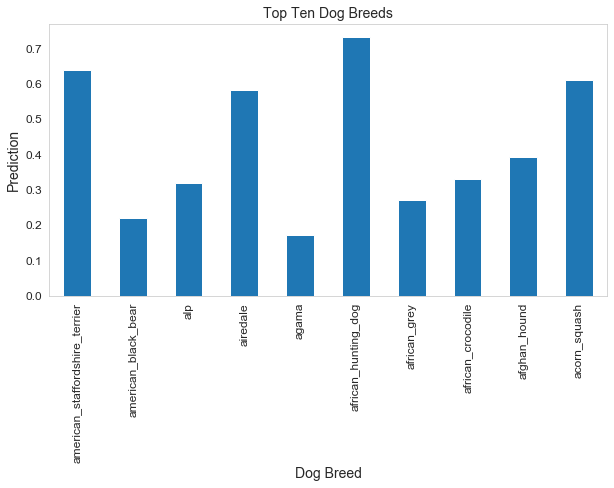

In [505]:
plt.figure(figsize = [10, 5]) 
sns.set_style("whitegrid", {'axes.grid' : False})

top_dogs = archive_clean.groupby('prediction_1').confidence_1.mean()[9::-1]

top_dogs.plot(kind = 'bar', fontsize = 12)
plt.title('Top Ten Dog Breeds', fontsize = 14)
plt.xlabel('Dog Breed', fontsize = 14)
plt.ylabel('Prediction', fontsize = 14);

In [506]:
#Most favored dog stage

alt.Chart(archive_clean[archive_clean['dog_stage']!= 'unknown']).mark_bar(color='blue', opacity=0.5).encode(
    alt.Y('dog_stage', axis=alt.Axis(title='Dog Stage')),
    alt.X('average(favorite_count)', axis=alt.Axis(title='Average Like Count'))
).properties(title = 'Most Favored Dog Stage as per Likes Count')

alt.Chart(...)

Puppo dogs are the most liked dog stage as per likes clicked

In [507]:
alt.Chart(archive_clean[archive_clean['dog_stage']!= 'unknown']).mark_bar(color = 'green', opacity = 0.5).encode(
    alt.Y('dog_stage', axis = alt.Axis(title = 'Dog Stage')),
    alt.X('average(retweet_count)', axis = alt.Axis(title = 'Average Retweet Count'))
).properties(title = 'Most Favored Dog Stage as per Retweet Count')

alt.Chart(...)

Puppo dogs are also the most liked dog stage as per retweets count

In [508]:
#Let's check correlation between rating and dog count

#Remove outliers for a better view
rating_favorite = archive_clean.copy()
rating_favorite['rating'] = rating_favorite['rating_numerator'] / rating_favorite['rating_denominator']
rating_favorite = rating_favorite[rating_favorite.rating <= 2] 
rating_favorite = rating_favorite[(rating_favorite.favorite_count <=130000)]

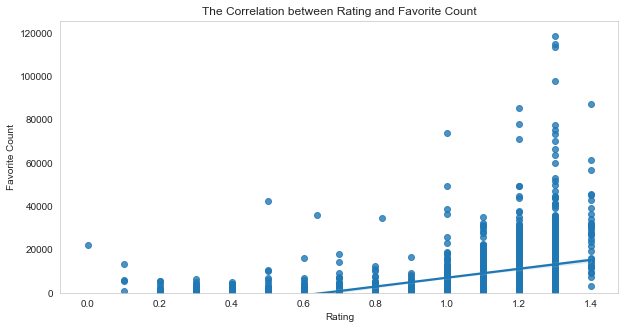

In [509]:
plt.figure(figsize = [10, 5]) 

ratingplot=sns.regplot(x = 'rating',y = 'favorite_count', data = rating_favorite)
ratingplot.set(ylim = (0, None))
plt.title('The Correlation between Rating and Favorite Count')
plt.xlabel('Rating')
plt.ylabel('Favorite Count')

fig =ratingplot.get_figure()
fig.savefig('ratingplot.png')

Seems like there is a positive correlation between ratings and favorite count. 